### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/colab/python basic/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [3]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


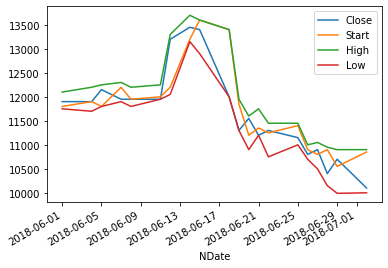

In [4]:
df1.plot()

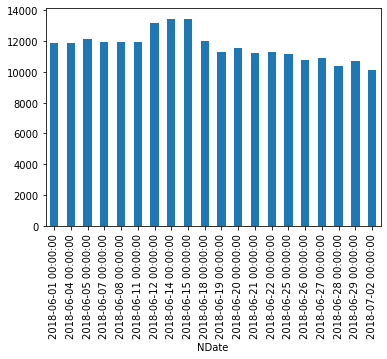

In [6]:
df1.Close[::-1].plot(kind='bar')

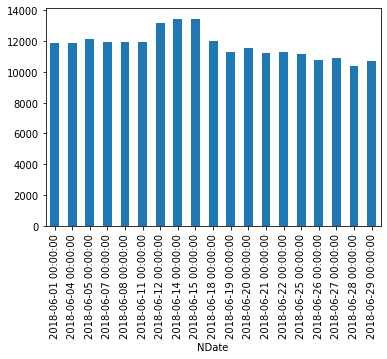

In [7]:
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

In [8]:
df1.Close.value_counts()

11950    3
11900    2
11300    2
11550    1
12000    1
11200    1
13400    1
12150    1
10100    1
10800    1
11150    1
10700    1
13450    1
10900    1
13200    1
10400    1
Name: Close, dtype: int64

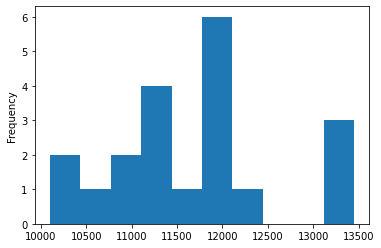

In [9]:
df1.Close.plot(kind='hist',bins=10)

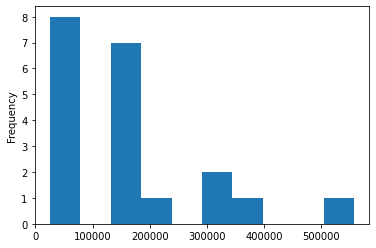

In [11]:
df.Volume.plot(kind='hist')

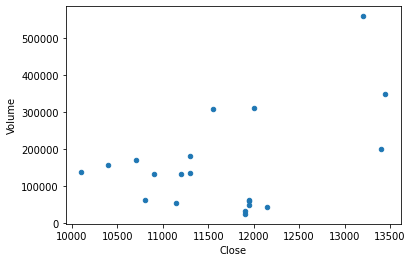

In [12]:
df.plot(x='Close',y='Volume',kind='scatter')

In [13]:
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


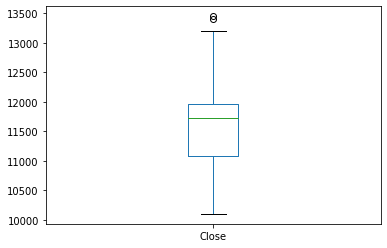

In [14]:
df.Close.plot(kind='box')

In [15]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [16]:
iqr = 11962.500000 - 11087.500000
uw_check = 11962.500000 + iqr*1.5
print(uw_check,'\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [17]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
  if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
    outlier.append(i)
print(outlier)

[13400, 13450]


In [18]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [19]:
df_ep = pd.read_excel('/content/drive/MyDrive/colab/python basic/dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


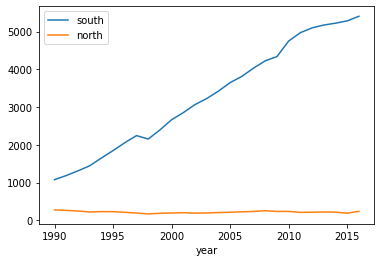

In [20]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

In [21]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/colab/python basic/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
df_auto.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [26]:
import numpy as np
df_auto.horsepower.replace('?',np.nan,inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [28]:
q3 = df_auto.mpg.describe()['75%']
q1 = df_auto.mpg.describe()['25%']
iqr = q3 - q1
uw_check = q3 + 1.5*iqr
print(uw_check, '\n')
m = df_auto.mpg.sort_values(ascending=False)
print(m[:5],'\n')
df_auto.mpg[df_auto.mpg >= uw_check]

46.25 

322    46.6
329    44.6
325    44.3
394    44.0
326    43.4
Name: mpg, dtype: float64 



322    46.6
Name: mpg, dtype: float64

In [29]:
df_auto[df_auto.mpg >= uw_check]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


In [30]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/colab/python basic/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


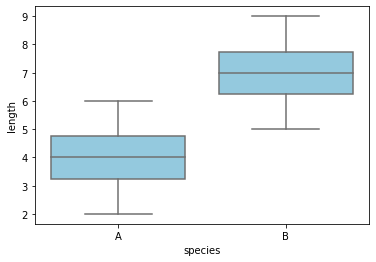

In [31]:
import seaborn as sns
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

In [32]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [33]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

In [34]:
data = np.random.rand(10000)*1000
data[:10]
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
df.describe()

          Num
0  382.875275
1  551.594636
2  486.956083
3  993.363717
4  915.999349


,Num
count,10000.000000
mean,500.162632
std,289.451982
min,0.122991
25%,249.938791
50%,497.989642
75%,751.526176
max,999.834389


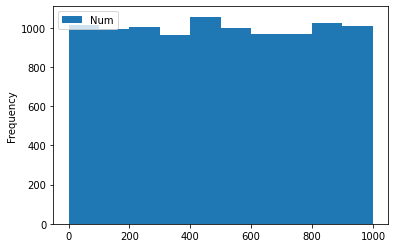

In [35]:
df.plot(kind='hist')

        Num
0  0.543896
1  0.419028
2  0.114962
3 -0.656968
4 -0.843775
                  Num
count  1000000.000000
mean        -0.001865
std          0.998969
min         -4.861795
25%         -0.675692
50%         -0.001620
75%          0.672800
max          4.655217
AxesSubplot(0.125,0.125;0.775x0.755)


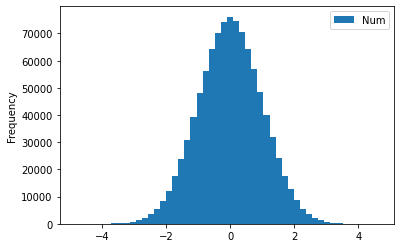

In [36]:
data = np.random.randn(1000000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
print(df.describe())
print(df.plot(kind='hist',bins=50))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


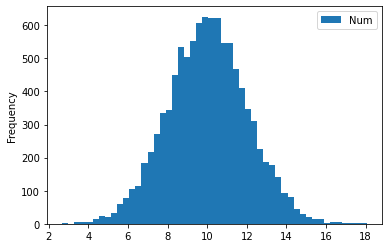

In [38]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2, size=10000)
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist',bins=50)

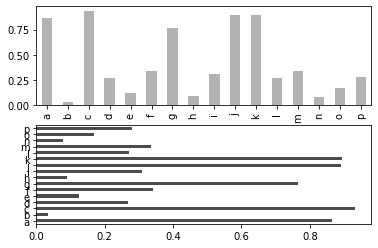

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.3)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

In [40]:
df = pd.DataFrame(np.random.rand(6,4), index=['one','two','three','four','five','six'],columns=['A','B','C','D'])
df

,A,B,C,D
one,0.314396,0.789679,0.982823,0.394681
two,0.787791,0.204297,0.848268,0.705182
three,0.919122,0.169110,0.929848,0.150823
four,0.135593,0.995470,0.842857,0.680344
five,0.843496,0.041681,0.404026,0.581456
six,0.670009,0.621954,0.871499,0.552468


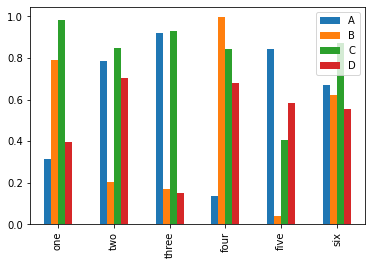

In [42]:
df.plot(kind='bar')

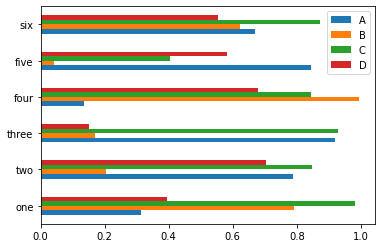

In [43]:
df.plot(kind='barh')

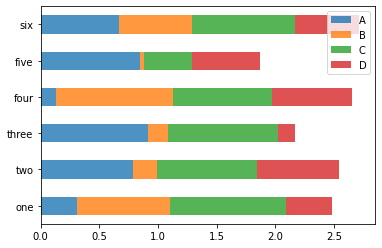

In [44]:
df.plot(kind='barh',stacked=True,alpha=0.8)

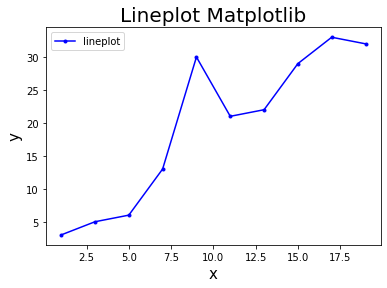

In [45]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(6,4))
plt.plot(x,y,color='blue',marker='o',markersize=3)
plt.title('Lineplot Matplotlib',size = 20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

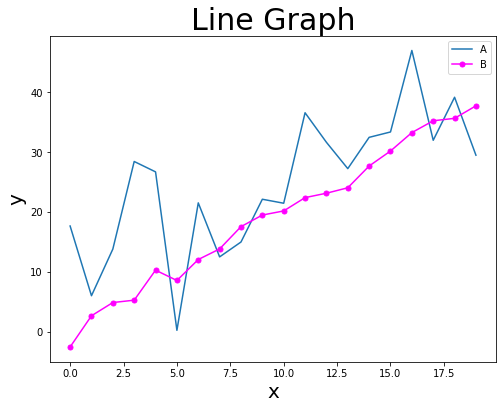

In [46]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(['A','B'])

range(0, 10)
[8 5 7 6 3 4 6 5 6 8]


Text(0.5, 0, 'x')

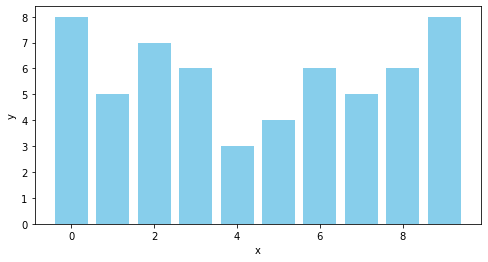

In [47]:
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')

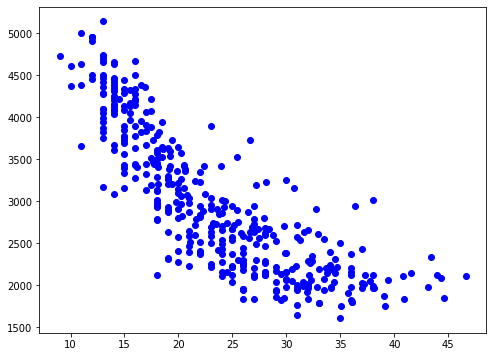

In [48]:
df_auto = pd.read_excel('/content/drive/MyDrive/colab/python basic/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <a list of 20 Patch objects>)

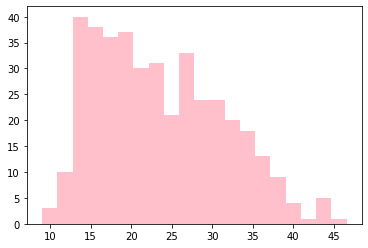

In [50]:
plt.hist(df_auto.mpg, bins=20,color='pink')

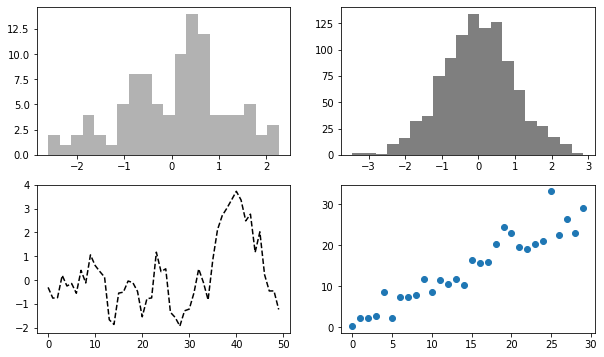

In [54]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.hist(np.random.randn(1000),bins=20,color='k',alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<BarContainer object of 10 artists>

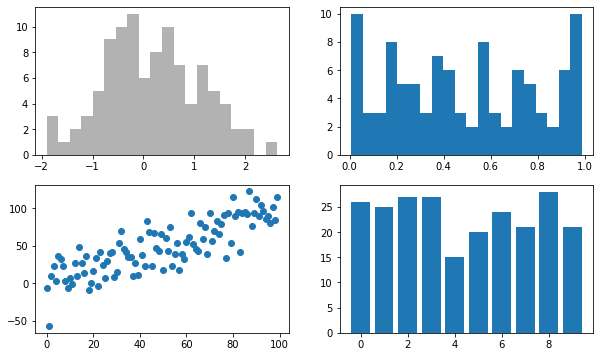

In [55]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.rand(100), bins = 20)
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30, 10))

(array([1.00000e+00, 0.00000e+00, 4.00000e+00, 9.00000e+00, 2.50000e+01,
        5.80000e+01, 1.84000e+02, 3.99000e+02, 8.43000e+02, 1.84100e+03,
        3.84500e+03, 7.48600e+03, 1.40120e+04, 2.52790e+04, 4.33290e+04,
        7.07630e+04, 1.10891e+05, 1.66993e+05, 2.38411e+05, 3.26448e+05,
        4.27071e+05, 5.34299e+05, 6.41646e+05, 7.33054e+05, 8.03063e+05,
        8.39423e+05, 8.41180e+05, 8.04485e+05, 7.35782e+05, 6.43320e+05,
        5.38042e+05, 4.28778e+05, 3.28972e+05, 2.40665e+05, 1.68163e+05,
        1.11528e+05, 7.16690e+04, 4.36820e+04, 2.51880e+04, 1.42540e+04,
        7.71600e+03, 3.82100e+03, 1.89700e+03, 8.46000e+02, 3.72000e+02,
        1.51000e+02, 6.30000e+01, 3.30000e+01, 1.20000e+01, 4.00000e+00]),
 array([-5.51905874e+00, -5.30686647e+00, -5.09467421e+00, -4.88248194e+00,
        -4.67028967e+00, -4.45809740e+00, -4.24590514e+00, -4.03371287e+00,
        -3.82152060e+00, -3.60932833e+00, -3.39713607e+00, -3.18494380e+00,
        -2.97275153e+00, -2.76055926e+00

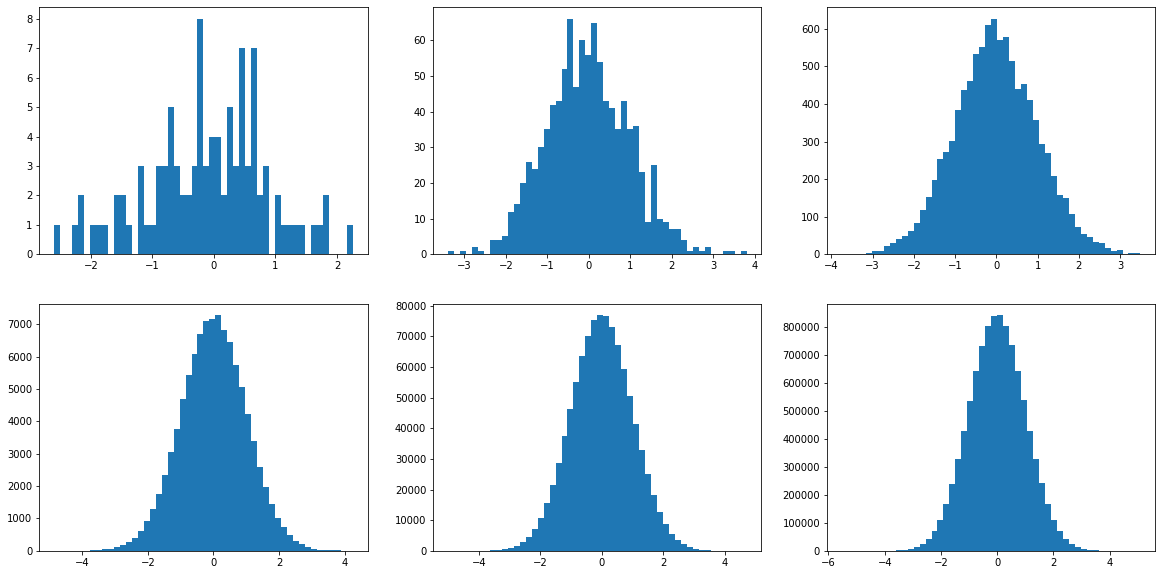

In [56]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

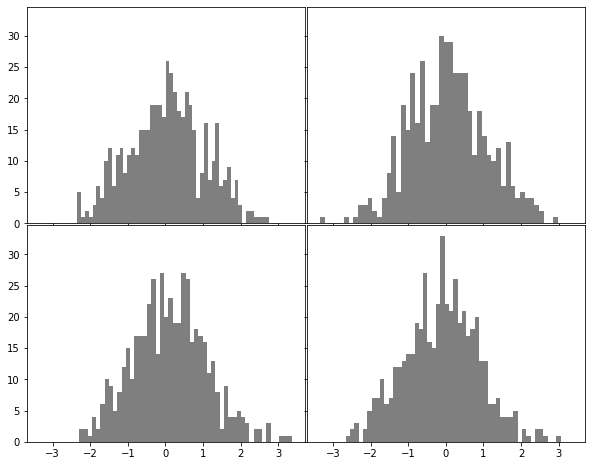

In [57]:
fig, axes = plt.subplots(2,2, figsize=(10,8), sharex = True, sharey = True)
for i in range(2):
  for j in range(2):
    axes[i,j].hist(np.random.randn(500),bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01, hspace=0.01)

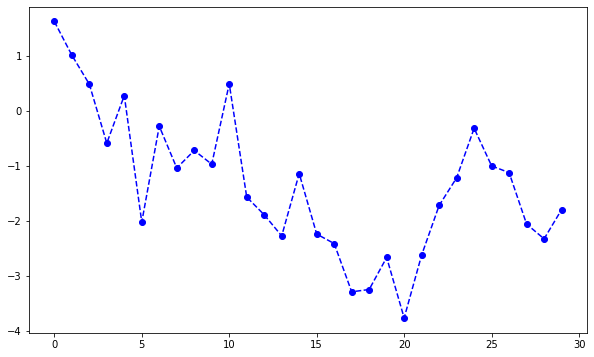

In [59]:
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed',color='b',marker='o')

In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [61]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

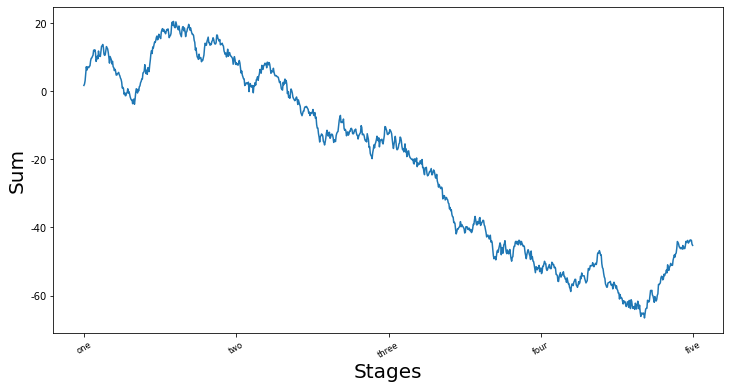

In [62]:
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)

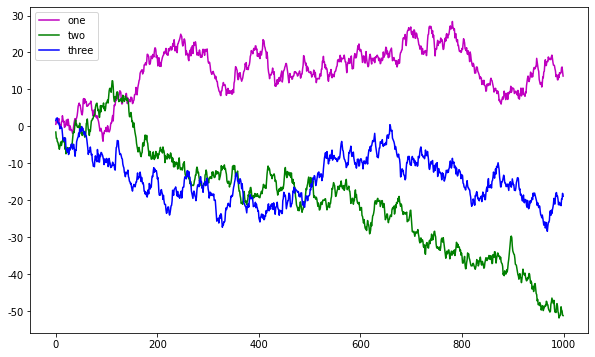

In [64]:
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m',label='one')
ax.plot(randn(1000).cumsum(),'g',label='two')
ax.plot(randn(1000).cumsum(),'b',label='three')
plt.legend(loc='best')

In [65]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat

df['age_cat'] = df['age'].apply(get_age_cat)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


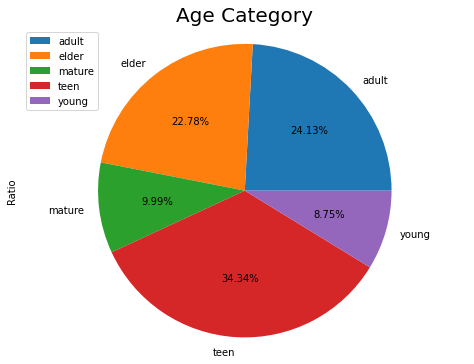

In [67]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',
                      figsize=(8,6),
                      autopct='%.2f%%',
                      startangle=0)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')